## Binary Classification of Machine Failures

In [1]:
! pip install -U imbalanced-learn

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Load Data

In [3]:
train_df = pd.read_csv('playground-series-s3e17/train.csv')
train_df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [5]:
#change column name
train_df.columns=['id','Product_ID', 'Type','Air_temperature', 'Process_temperature','Rotational_speed', 'Torque', 
                  'Tool_wear','Machine_failure','TWF', 'HDF', 'PWF', 'OSF', 'RNF']
train_df.head()

,id,Product_ID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   136429 non-null  int64  
 1   Product_ID           136429 non-null  object 
 2   Type                 136429 non-null  object 
 3   Air_temperature      136429 non-null  float64
 4   Process_temperature  136429 non-null  float64
 5   Rotational_speed     136429 non-null  int64  
 6   Torque               136429 non-null  float64
 7   Tool_wear            136429 non-null  int64  
 8   Machine_failure      136429 non-null  int64  
 9   TWF                  136429 non-null  int64  
 10  HDF                  136429 non-null  int64  
 11  PWF                  136429 non-null  int64  
 12  OSF                  136429 non-null  int64  
 13  RNF                  136429 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 14.6+ MB


In [7]:
train_df.shape

(136429, 14)

### EDA

#### Drop Product ID

In [8]:
train_df['Product_ID'].value_counts()

L53257    139
L53271    131
L49056    131
L54275    120
L48892    120
         ... 
L48064      1
M15778      1
M19905      1
M21579      1
L52490      1
Name: Product_ID, Length: 9976, dtype: int64

#### Process Type

In [9]:
#change Type to categorical data
train_df['Type'].astype("category")

0         L
1         M
2         L
3         L
4         M
         ..
136424    M
136425    H
136426    L
136427    L
136428    L
Name: Type, Length: 136429, dtype: category
Categories (3, object): ['H', 'L', 'M']

In [10]:
train_df['Type'].value_counts()

L    95354
M    32152
H     8923
Name: Type, dtype: int64

#### Air temperature [K]

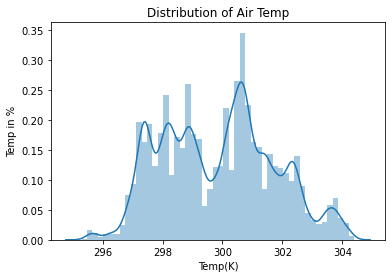

In [11]:
sns.distplot(train_df['Air_temperature'])
plt.title("Distribution of Air Temp")
plt.xlabel("Temp(K)")
plt.ylabel("Temp in %")
plt.show()
#train_df['Air temperature [K]'].plot(kind = 'bar')

#### Process temperature [K]

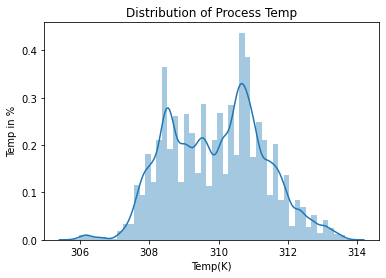

In [12]:
sns.distplot(train_df['Process_temperature'])
plt.title("Distribution of Process Temp")
plt.xlabel("Temp(K)")
plt.ylabel("Temp in %")
plt.show()

#### Rotational speed [rpm]

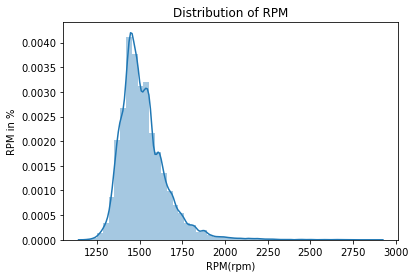

In [13]:
sns.distplot(train_df['Rotational_speed'])
plt.title("Distribution of RPM")
plt.xlabel("RPM(rpm)")
plt.ylabel("RPM in %")
plt.show()

Max: 1802.0 / Min: 1210.0
upper extreme outlier: 2024.0
data counts above upper extreme outlier: 1149
% of data counts above upper extreme outlier:  0.842196%


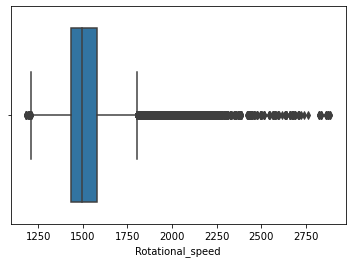

In [14]:
bp = sns.boxplot(train_df['Rotational_speed'])
data = train_df['Rotational_speed']
MEDIAN = data.median()
IQR = data.quantile(0.75)-data.quantile(0.25)
MAXIMUM = data.quantile(0.75)+1.5*IQR
MINIMUM = data.quantile(0.25)-1.5*IQR
print(f'Max: {MAXIMUM} / Min: {MINIMUM}')
extreme_outlier_up = MAXIMUM + 1.5*IQR
print(f'upper extreme outlier: {extreme_outlier_up}')
print(f'data counts above upper extreme outlier: {len(train_df[data>extreme_outlier_up])}')
print(f'% of data counts above upper extreme outlier: ','{:2%}'.format(len(train_df[data>extreme_outlier_up])/len(train_df)))
#plt.show()

#### Torque [Nm]

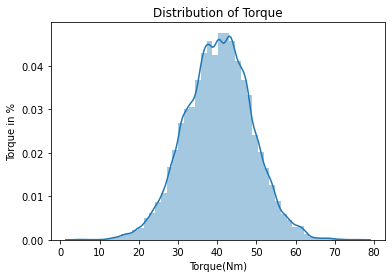

In [15]:
sns.distplot(train_df['Torque'])
plt.title("Distribution of Torque")
plt.xlabel("Torque(Nm)")
plt.ylabel("Torque in %")
plt.show()

#### Tool wear [min]

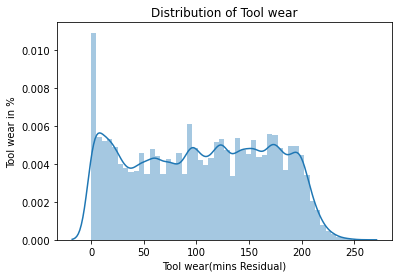

In [16]:
sns.distplot(train_df['Tool_wear'])
plt.title("Distribution of Tool wear")
plt.xlabel("Tool wear(mins Residual)")
plt.ylabel("Tool wear in %")
plt.show()

#### Machine failure

In [17]:
Malfunc = pd.DataFrame(train_df['Machine_failure'].value_counts())
Malfunc.columns = ['Counts']
#print(Malfunc)
Malfunc['Ratio'] = Malfunc['Counts']/Malfunc['Counts'].sum()
Malfunc['Ratio'] = Malfunc['Ratio'].apply(lambda x: '{:.2%}'.format(x))
Malfunc

,Counts,Ratio
0,134281,98.43%
1,2148,1.57%


#### TWF

In [18]:
TWF = pd.DataFrame(train_df['TWF'].value_counts())
TWF.columns = ['Counts']
TWF['Ratio'] = TWF['Counts']/TWF['Counts'].sum()
TWF['Ratio'] = TWF['Ratio'].apply(lambda x: '{:.2%}'.format(x))
TWF

,Counts,Ratio
0,136217,99.84%
1,212,0.16%


#### HDF

In [19]:
HDF = pd.DataFrame(train_df['HDF'].value_counts())
HDF.columns = ['Counts']
HDF['Ratio'] = HDF['Counts']/HDF['Counts'].sum()
HDF['Ratio'] = HDF['Ratio'].apply(lambda x: '{:.2%}'.format(x))
HDF

,Counts,Ratio
0,135725,99.48%
1,704,0.52%


#### PWF

In [20]:
PWF = pd.DataFrame(train_df['PWF'].value_counts())
PWF.columns = ['Counts']
PWF['Ratio'] = PWF['Counts']/PWF['Counts'].sum()
PWF['Ratio'] = PWF['Ratio'].apply(lambda x: '{:.2%}'.format(x))
PWF

,Counts,Ratio
0,136102,99.76%
1,327,0.24%


#### OSF

In [21]:
OSF = pd.DataFrame(train_df['OSF'].value_counts())
OSF.columns = ['Counts']
OSF['Ratio'] = OSF['Counts']/OSF['Counts'].sum()
OSF['Ratio'] = OSF['Ratio'].apply(lambda x: '{:.2%}'.format(x))
OSF

,Counts,Ratio
0,135889,99.60%
1,540,0.40%


#### RNF

In [22]:
RNF = pd.DataFrame(train_df['RNF'].value_counts())
RNF.columns = ['Counts']
RNF['Ratio'] = RNF['Counts']/RNF['Counts'].sum()
RNF['Ratio'] = RNF['Ratio'].apply(lambda x: '{:.2%}'.format(x))
RNF

,Counts,Ratio
0,136121,99.77%
1,308,0.23%


### drop unwanted data

Since there's 9976 unique value in Product ID, which cannot be grouped, or other signifacant traits, therefore will drop this column.

In [23]:
train_df_2=train_df.drop(columns = ['id', 'Product_ID'])
#train_df_2 = train_df.[['Type','Air temperature [K]','Process temperature [K]','Rotational speed [rpm]',
#                       'Torque [Nm]','Tool wear [min]','Machine failure','TWF','HDF','PWF','OSF','RNF']]
train_df_2 = train_df_2.loc[~(train_df_2['Rotational_speed']>extreme_outlier_up)]
train_df_2

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
136424,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [24]:
train_df_2.shape

(135280, 12)

### One-Hot encoding

In [25]:
train_df_2 = pd.get_dummies(train_df_2, drop_first=True)
train_df_2.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Machine_failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,1


In [26]:
train_df_2.shape

(135280, 13)

### Imbalanced data

In [27]:
#target variable before removing the outliers
train_df['Machine_failure'].value_counts()

0    134281
1      2148
Name: Machine_failure, dtype: int64

In [28]:
#target variable shape after removing the outliers
num=train_df_2['Machine_failure'].value_counts()
num

0    133240
1      2040
Name: Machine_failure, dtype: int64

<AxesSubplot:ylabel='Machine_failure'>

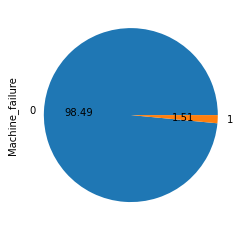

In [29]:
num.plot(kind='pie',autopct='%.2f')

From the above table, we can see that it imbalanced for our dataset, will use methods to fix this problem:
1. Random undersampling
2. Random oversampling: SMOTE

## Train, test data split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X, y = train_df_2.drop("Machine_failure", axis=1), train_df_2["Machine_failure"]

In [32]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=1)

## Dealing with imbalanced data

### Under sampling- Random

In [33]:
from imblearn.under_sampling import RandomUnderSampler

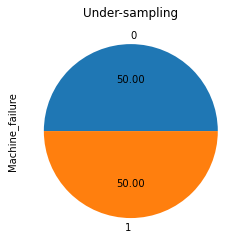

In [34]:
#undersampling
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_train, y_train)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [35]:
# Class distribution
y_res.value_counts()

0    1645
1    1645
Name: Machine_failure, dtype: int64

### Over sampling-Random

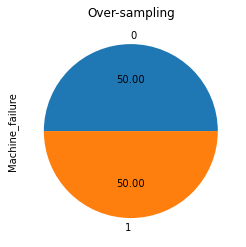

In [36]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res1, y_res1 = ros.fit_resample(X_train, y_train)

ax = y_res1.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")
     

In [37]:
# Class distribution
y_res1.value_counts()

0    106579
1    106579
Name: Machine_failure, dtype: int64

### Over sampling-SMOTE
https://iq.opengenus.org/smote-for-imbalanced-dataset/

In [38]:
from imblearn.over_sampling import SMOTE

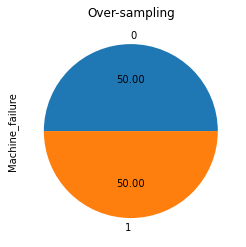

In [39]:
#oversampling
sm=SMOTE(random_state = 2, sampling_strategy="not majority")
X_res2, y_res2 = sm.fit_resample(X_train, y_train)

ax = y_res2.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [40]:
y_res2.value_counts()

0    106579
1    106579
Name: Machine_failure, dtype: int64

In [41]:
X_res2.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,297.4,308.4,1540,45.3,9,0,0,0,0,0,0,1
1,300.5,311.6,1517,33.0,7,0,0,0,0,0,0,1
2,299.8,309.6,1397,53.2,52,0,0,0,0,0,1,0
3,298.8,310.0,1467,44.6,154,0,0,0,0,0,1,0
4,299.2,308.4,1589,34.4,127,0,0,0,0,0,1,0


## Modeling

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [43]:
#logistic regrssion model
log = LogisticRegression()
#fit model to the train data
log.fit(X_res2, y_res2)
#predict on the test data to check the accuracy
y_pred_log = log.predict(X_test)
#calculate the accuracy acore
acc_log = round(log.score(X_test, y_test) * 100, 2)
print ('Accuracy for Logistic Regrssion: '+str(acc_log) + ' percent')

Accuracy for Logistic Regrssion: 87.2 percent


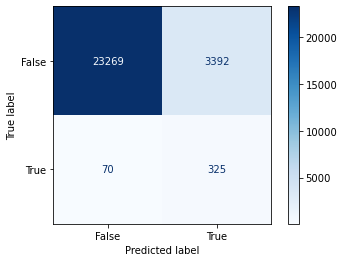

In [44]:
#Confusion matrix
actual = y_test
predicted_log = y_pred_log
#compute the confusion matrix
confusion_matrix_log = metrics.confusion_matrix(actual, predicted_log)
#plot the confusion matrix
cm_log = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_log, display_labels = [False, True])
cm_log.plot(cmap='Blues')
plt.show()

In [45]:
# Classification Report
print(classification_report(actual, predicted_log))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     26661
           1       0.09      0.82      0.16       395

    accuracy                           0.87     27056
   macro avg       0.54      0.85      0.54     27056
weighted avg       0.98      0.87      0.92     27056



### Stochastic Gradient Decent(SGD)

In [46]:
from sklearn.linear_model import SGDClassifier

In [47]:
sgd=SGDClassifier()
sgd.fit(X_res2, y_res2)
y_pred_sgd = sgd.predict(X_test)
acc_sgd = round( sgd.score(X_test, y_test) * 100, 2)
print ('Accuracy for Stochastic Gradient Decent: '+str(acc_sgd)+ ' percent')

Accuracy for Stochastic Gradient Decent: 1.5 percent


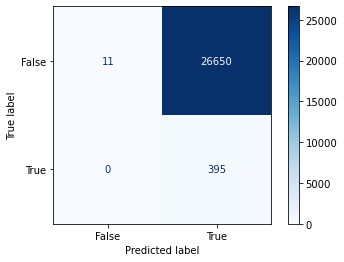

In [48]:
#Confusion matrix
actual = y_test
predicted_sgd = y_pred_sgd
#compute the confusion matrix
confusion_matrix_sgd = metrics.confusion_matrix(actual, predicted_sgd)
#plot the confusion matrix
cm_sgd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_sgd, display_labels = [False, True])
cm_sgd.plot(cmap='Blues')
plt.show()

In [49]:
# Classification Report
print(classification_report(actual, predicted_sgd))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     26661
           1       0.01      1.00      0.03       395

    accuracy                           0.02     27056
   macro avg       0.51      0.50      0.01     27056
weighted avg       0.99      0.02      0.00     27056



### Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
gb= GradientBoostingClassifier()
gb.fit(X_res2, y_res2)
y_pred_gb = gb.predict(X_test)
acc_gb = round( gb.score(y_pred_gb, y_test) * 100, 2)
print ('Accuracy for Gradient Boosting: '+str(acc_gb)+ ' percent')

ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0. ... 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

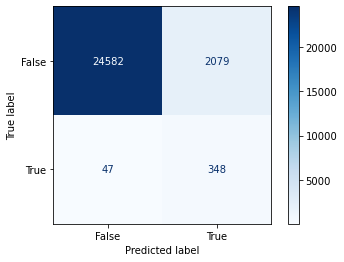

In [52]:
#Confusion matrix
actual = y_test
predicted_gb = y_pred_gb
#compute the confusion matrix
confusion_matrix_gb = metrics.confusion_matrix(actual, predicted_gb)
#plot the confusion matrix
cm_gb = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_gb, display_labels = [False, True])
cm_gb.plot(cmap='Blues')
plt.show()

In [53]:
# Classification Report
print(classification_report(actual, predicted_gb))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     26661
           1       0.14      0.88      0.25       395

    accuracy                           0.92     27056
   macro avg       0.57      0.90      0.60     27056
weighted avg       0.99      0.92      0.95     27056



### XGBoost

In [54]:
from xgboost import XGBClassifier

In [55]:
# fit model on training data
xgb = XGBClassifier()
xgb.fit(X_res2, y_res2)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = round( xgb.score(X_test, y_test) * 100, 2)
print ('Accuracy for XGBoost: '+str(acc_xgb)+ ' percent')

Accuracy for XGBoost: 99.27 percent


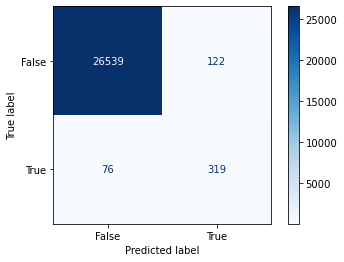

In [56]:
#Confusion matrix
actual = y_test
predicted_xgb = y_pred_xgb
#compute the confusion matrix
confusion_matrix_xgb = metrics.confusion_matrix(actual, predicted_xgb)
#plot the confusion matrix
cm_xgb = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_xgb, display_labels = [False, True])
cm_xgb.plot(cmap='Blues')
plt.show()

In [57]:
# Classification Report
print(classification_report(actual, predicted_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26661
           1       0.72      0.81      0.76       395

    accuracy                           0.99     27056
   macro avg       0.86      0.90      0.88     27056
weighted avg       0.99      0.99      0.99     27056



In [58]:
#AUC ROC curve
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

XGBoost AUC score: 0.9015094821573634


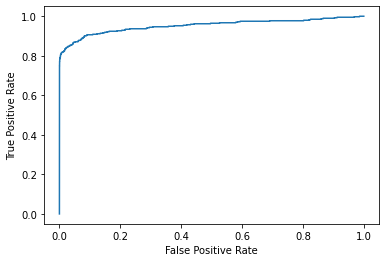

In [70]:
xgb_probs = xgb.predict_proba(X_test)
xgb_probs =xgb_probs [:, 1]

plot_roc_curve(y_test, xgb_probs)
print(f'XGBoost AUC score: {roc_auc_score(y_test, predicted_xgb)}')

From the above 4 models, we can see that XGBoost performs the best, having the highest accuracy, and also the higest precission and recall.

### XGBoost parameter tuning-Optuna

In [82]:
xgb.

AttributeError: 'XGBClassifier' object has no attribute 'param'

## Apply on Test data

In [71]:
test_df = pd.read_csv('playground-series-s3e17/test.csv')
test_df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [73]:
#change column name
test_df.columns=['id','Product_ID', 'Type','Air_temperature', 'Process_temperature','Rotational_speed', 'Torque', 
                  'Tool_wear','TWF', 'HDF', 'PWF', 'OSF', 'RNF']

In [74]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   90954 non-null  int64  
 1   Product_ID           90954 non-null  object 
 2   Type                 90954 non-null  object 
 3   Air_temperature      90954 non-null  float64
 4   Process_temperature  90954 non-null  float64
 5   Rotational_speed     90954 non-null  int64  
 6   Torque               90954 non-null  float64
 7   Tool_wear            90954 non-null  int64  
 8   TWF                  90954 non-null  int64  
 9   HDF                  90954 non-null  int64  
 10  PWF                  90954 non-null  int64  
 11  OSF                  90954 non-null  int64  
 12  RNF                  90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [75]:
#change the setting of test data to fit the model
test_df = test_df.drop(columns = ['id', 'Product_ID'])
test_df['Type'] = test_df['Type'].astype("category")
test_df = pd.get_dummies(test_df, drop_first=True)

In [76]:
test_df.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,302.3,311.5,1499,38.0,60,0,0,0,0,0,1,0
1,301.7,311.0,1713,28.8,17,0,0,0,0,0,1,0
2,301.3,310.4,1525,37.7,96,0,0,0,0,0,1,0
3,300.1,309.6,1479,47.6,5,0,0,0,0,0,0,1
4,303.4,312.3,1515,41.3,114,0,0,0,0,0,0,1


In [79]:
#apply test to the trained model
prediction=xgb.predict_proba(test_df)[:, 1]
prediction

array([0.00980509, 0.01530768, 0.01026821, ..., 0.00282113, 0.0092748 ,
       0.01092911], dtype=float32)

In [80]:
test = pd.read_csv('playground-series-s3e17/test.csv')
predict = pd.DataFrame({
        "id": test["id"],
        "Machine failure":prediction
})

In [81]:
predict.to_csv("Machine_failure_submission.csv", index=False)